In [119]:
# Assignment - Bike Sharing Data Science # By Senthilkumar Durairajan

In [120]:
# Import filter warnings to supress warning messages
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [121]:
# Importing the necessary required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
%matplotlib inline

sns.set()

In [122]:
# Step - 1. Reading, understandig and visualising data


In [123]:
# Read and understand the dataset

bike_sen= pd.read_csv("./Bike Sharing Data Set/day.csv")

In [124]:
# Getting bikes dataset how it looks like

bike_sen.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [125]:
# Getting bikes dataset how it looks like

bike_sen.shape

(730, 16)

In [126]:
#Getting some information like dataype of columns on the bikes dataset

bike_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [127]:
# Let's see some summary and Get basic idea of data using describe()

bike_sen.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [128]:
# Missing Values

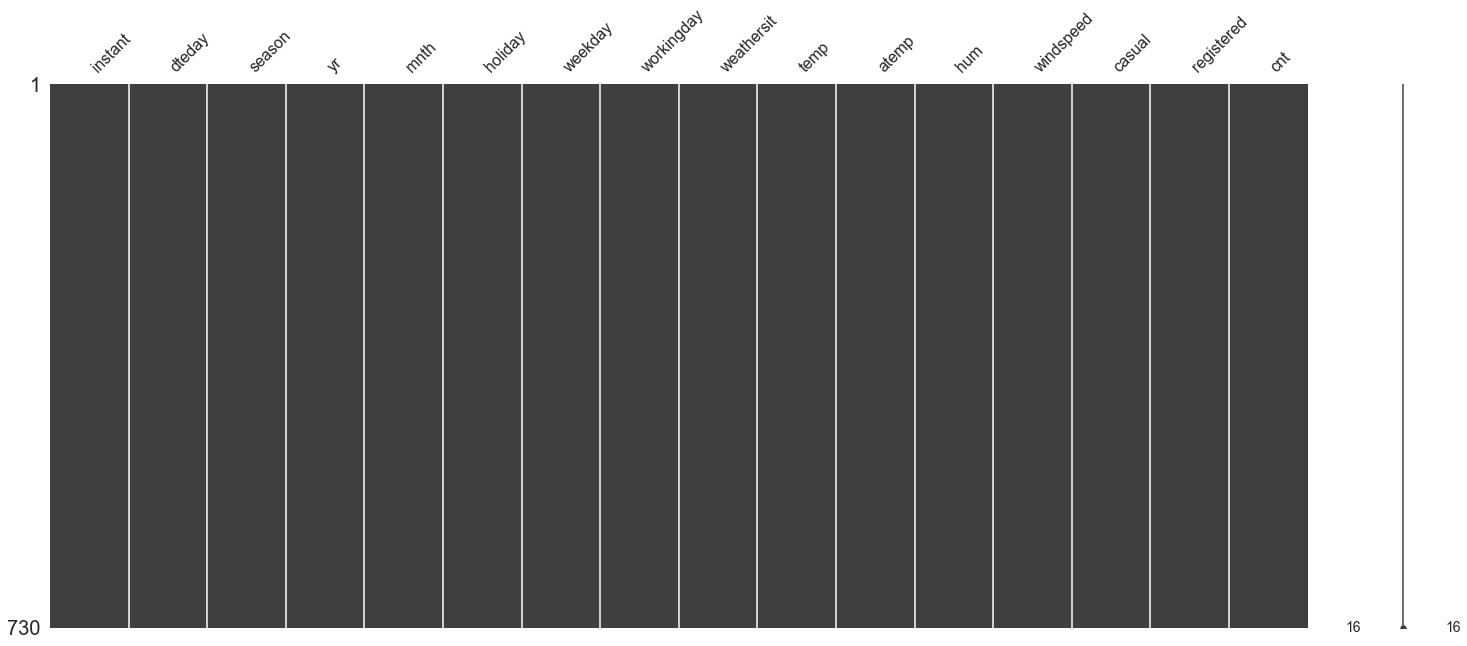

In [129]:
# To check if there are any missing values in the dataset

mn.matrix(bike_sen)

In [130]:
#no missing values in the dataset#

In [131]:
bike_sen['dteday'].dtype

dtype('O')

In [132]:
#Converting the datatype of dteday column to datetime.

In [133]:
bike_sen['dteday'] =  pd.to_datetime(bike_sen['dteday'],format='%d-%m-%Y')
bike_sen['dteday'].dtype

dtype('<M8[ns]')

In [134]:
#Extracting the Month & year from the Date

In [135]:
bike_sen['year'] = pd.DatetimeIndex(bike_sen['dteday']).year
bike_sen['month'] = pd.DatetimeIndex(bike_sen['dteday']).month

In [136]:
bike_sen.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        6           0   
1        2 2018-01-02       1   0     1        0        0           0   
2        3 2018-01-03       1   0     1        0        1           1   
3        4 2018-01-04       1   0     1        0        2           1   
4        5 2018-01-05       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  year  month  
0   985  2018      1  
1   801  2018      1  
2  1349  2018      1  
3  1562  2018      1  
4  1600  2018      1

In [137]:
# columns dropped as we have extracte#d the correct year & month from the date.

bike_sen.drop(['yr','mnth'],axis=1,inplace=True)

In [138]:
bike_sen.head()

instant     dteday  season  holiday  weekday  workingday  weathersit  \
0        1 2018-01-01       1        0        6           0           2   
1        2 2018-01-02       1        0        0           0           2   
2        3 2018-01-03       1        0        1           1           1   
3        4 2018-01-04       1        0        2           1           1   
4        5 2018-01-05       1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  year  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985  2018   
1  14.902598  17.68695  69.6087  16.652113     131         670   801  2018   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  2018   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  2018   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600  2018   

   month  
0      1  
1      1  
2      1  
3      1  
4      1

In [139]:
#The redundant variable holiday is dropping as the workingday column covers enough information that is required.

bike_sen.drop('holiday',axis=1,inplace=True)

In [140]:
#The dteday,instant,casual and registered columns are dropping .

bike_sen.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [141]:
bike_sen.head()

season  weekday  workingday  weathersit       temp     atemp      hum  \
0       1        6           0           2  14.110847  18.18125  80.5833   
1       1        0           0           2  14.902598  17.68695  69.6087   
2       1        1           1           1   8.050924   9.47025  43.7273   
3       1        2           1           1   8.200000  10.60610  59.0435   
4       1        3           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  year  month  
0  10.749882   985  2018      1  
1  16.652113   801  2018      1  
2  16.636703  1349  2018      1  
3  10.739832  1562  2018      1  
4  12.522300  1600  2018      1

In [142]:
bike_sen.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [143]:
bike_sen.head()

season  weekday  workingday  weathersit       temp     atemp  humidity  \
0       1        6           0           2  14.110847  18.18125   80.5833   
1       1        0           0           2  14.902598  17.68695   69.6087   
2       1        1           1           1   8.050924   9.47025   43.7273   
3       1        2           1           1   8.200000  10.60610   59.0435   
4       1        3           1           1   9.305237  11.46350   43.6957   

   windspeed  count  year  month  
0  10.749882    985  2018      1  
1  16.652113    801  2018      1  
2  16.636703   1349  2018      1  
3  10.739832   1562  2018      1  
4  12.522300   1600  2018      1

In [144]:
#Data Preparation :
#Variables 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). 
#These numeric values associated with the labels may indicate that there is some order to them, - which is actually not the case 

In [145]:
#Step 2: Encoding the Labels & Visualization
#1)Season
          #1: spring
          #2: summer
          #3: fall
          #4: winter

In [146]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_sen['season'] = bike_sen['season'].map(codes)

In [147]:
#Exploratory Data Analysis :
# Analysis of various variables w.r.t 'count' ie., target variable through Visualization:
# 1. Season 

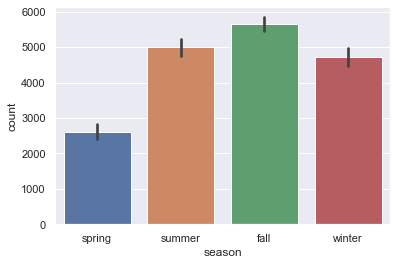

In [148]:
#Demand Analysis in various seasons
sns.barplot('season','count',data=bike_sen)

In [149]:
# Results: Bikes rented are more during the Fall season.

In [150]:
# Weathersit
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [151]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_sen['weathersit'] = bike_sen['weathersit'].map(codes)

In [152]:
# Analysing the demand in various weathers

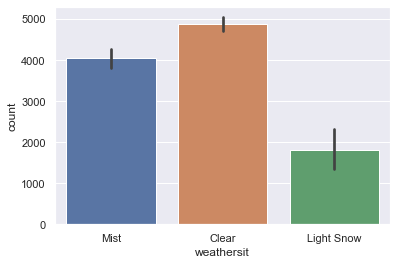

In [153]:
sns.barplot('weathersit','count',data=bike_sen)

In [154]:
#Result:Bikes rented are more in the Clear weather

In [155]:
#Working Day: If day is neither weekend nor holiday is 1, otherwise is 0
codes = {1:'working_day',0:'Holiday'}
bike_sen['workingday'] = bike_sen['workingday'].map(codes)

In [156]:
# # Analysing the demand in various weekdays

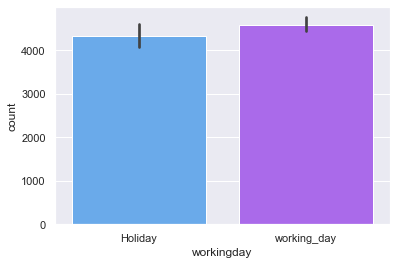

In [157]:
sns.barplot('workingday','count',data=bike_sen,palette='cool')

In [158]:
#Bikes to be rented more on working days.

In [159]:
# YEAR:
     # 2018:0
     # 2019:1

In [160]:
codes = {2019:1,2018:0}
bike_sen['year'] = bike_sen['year'].map(codes)

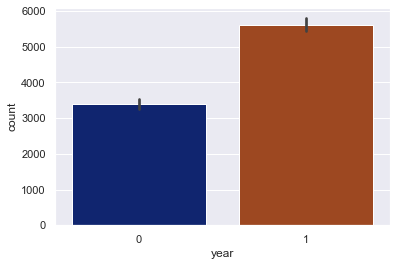

In [161]:
# # Analysing the demand in year 2018 and 2019
sns.barplot('year','count',data=bike_sen,palette='dark')

In [162]:
# Result: Bikes rented more in the year of 2019 as compared to 2018

In [163]:
# MONTH:

In [164]:
# Month column mapping as:
# 1: Jan , 2: Feb , 3: Mar , 4: Apr , 5: May , 6: Jun , 7: Jul , 8: Aug , 9: Sep , 10: Oct , 11: Nov , 12: Dec

In [165]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_sen['month'] = bike_sen['month'].map(codes)

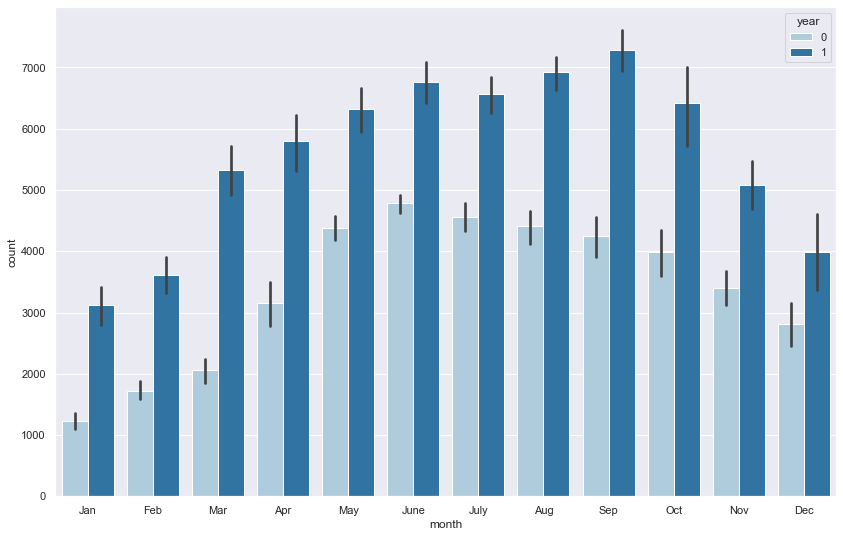

In [166]:
# # Analysing the demand in various months
plt.figure(figsize=(14,9))
sns.barplot('month','count',hue='year',data=bike_sen,palette='Paired')

In [167]:
#Bikes are rented more in the month of Sep 2019.

In [168]:
# WeekDay:
# 0: Sunday 1: Monday 2: Tuesday 3: Wednesday 4: Thursday 5: Friday 6: Saturday

In [169]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_sen['weekday'] = bike_sen['weekday'].map(codes)

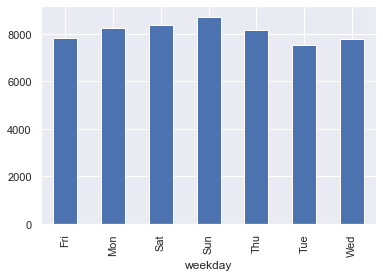

In [170]:
bike_sen.groupby('weekday')['count'].max().plot(kind='bar')

In [171]:
# Bikes rented are more on Sunday

In [172]:
# Visualizing continuous variables 'temp','atemp','humidity','windspeed' w.r.t 'count ' variable through a pairplot.

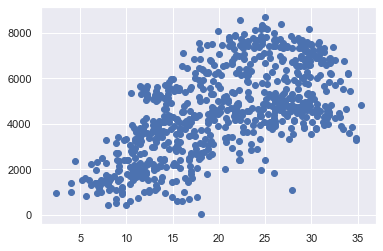

In [173]:
#TEMP:
plt.scatter('temp','count',data=bike_sen)

In [174]:
# Bike Rentals observed at higher temperatures

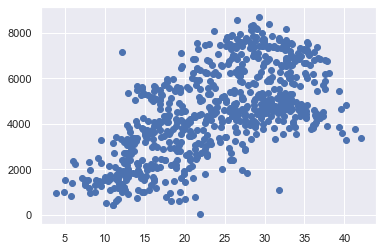

In [175]:
#ATEMP
plt.scatter('atemp','count',data=bike_sen)

In [176]:
# Bike Rentals are observed at higher "feel-like" temperatures.

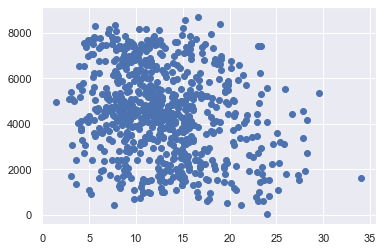

In [177]:
#WINDSPEED
plt.scatter('windspeed','count',data=bike_sen)

In [178]:
# Wind speeds increase with a higher temperature difference.
# Wind speed near the surface is most highly correlated with the temperature

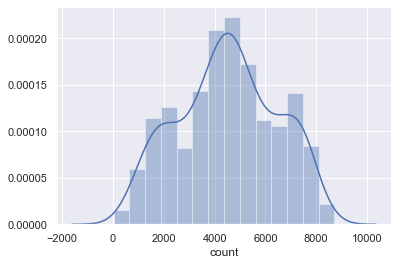

In [179]:
# Visualizing the Relationship among variables
sns.distplot(bike_sen['count'])

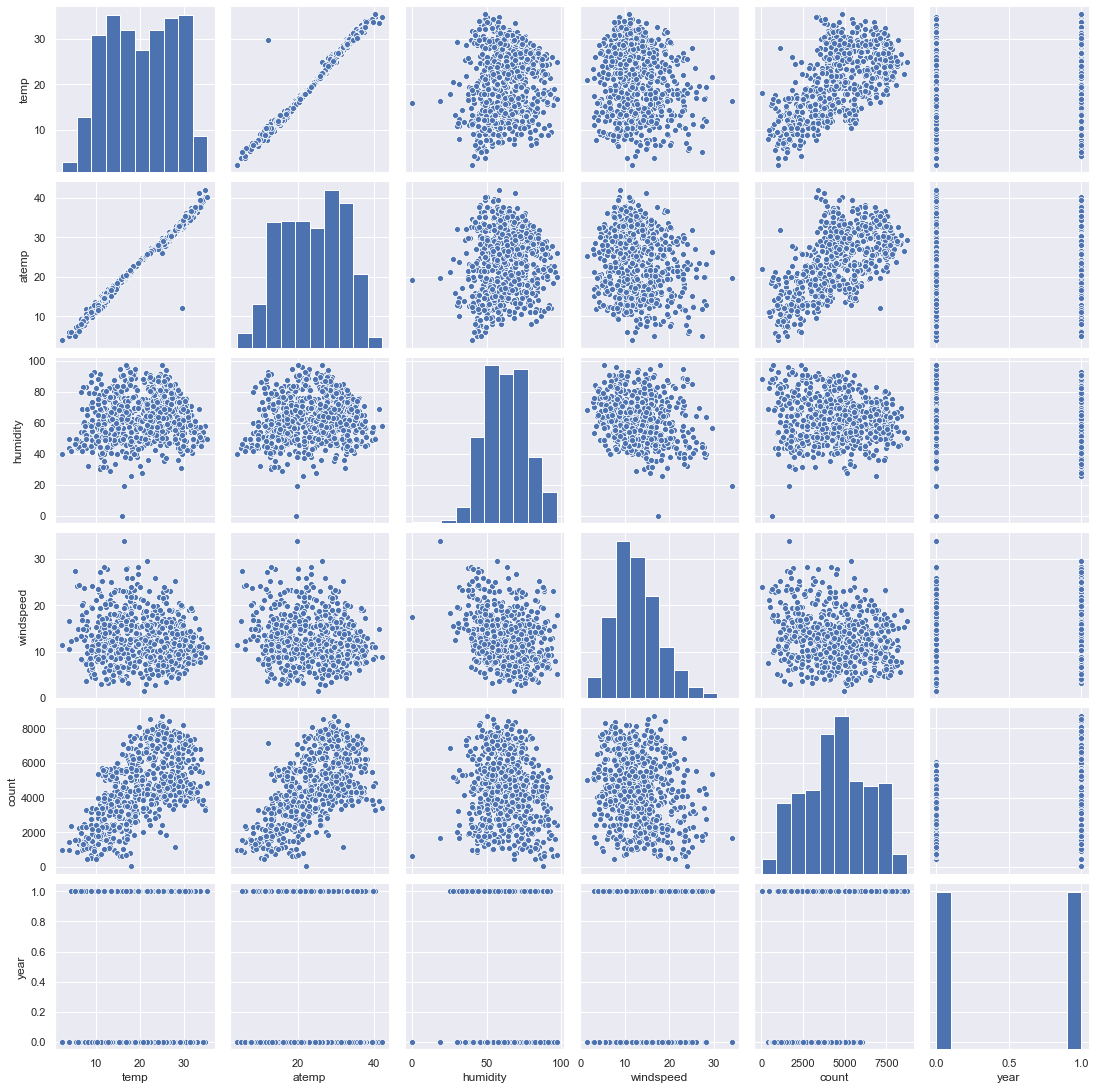

In [180]:
# Visualizing the Relationship among variables
sns.pairplot(bike_sen)

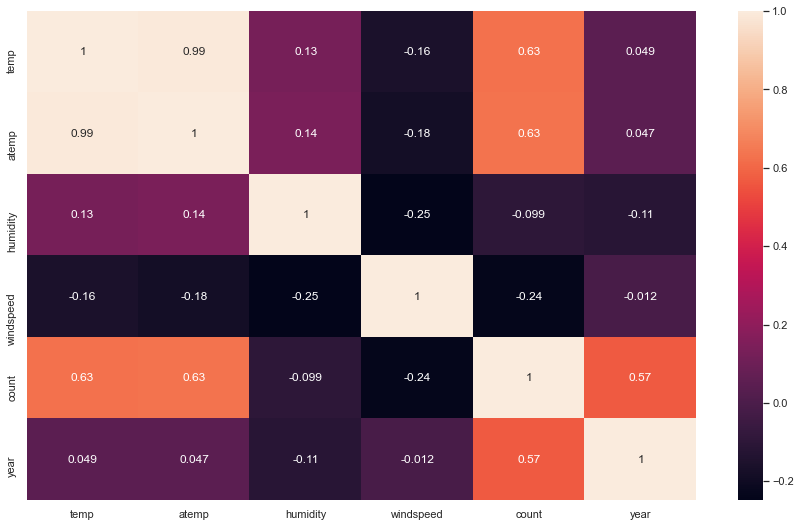

In [181]:
plt.figure(figsize = (15,9))
sns.heatmap(bike_sen.corr(),annot=True)

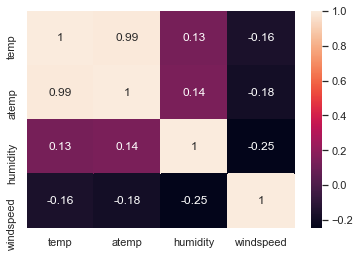

In [182]:
data= bike_sen[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

In [183]:
# Results shows atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.

In [184]:
bike_sen.drop('atemp',axis=1,inplace=True)

In [185]:
bike_sen.head()

season weekday   workingday weathersit       temp  humidity  windspeed  \
0  spring     Sun      Holiday       Mist  14.110847   80.5833  10.749882   
1  spring     Mon      Holiday       Mist  14.902598   69.6087  16.652113   
2  spring     Tue  working_day      Clear   8.050924   43.7273  16.636703   
3  spring     Wed  working_day      Clear   8.200000   59.0435  10.739832   
4  spring     Thu  working_day      Clear   9.305237   43.6957  12.522300   

   count  year month  
0    985     0   Jan  
1    801     0   Jan  
2   1349     0   Jan  
3   1562     0   Jan  
4   1600     0   Jan

In [186]:
#How to handle Categorical Variables

In [187]:
seasons = pd.get_dummies(bike_sen['season'],drop_first=True)

working_day = pd.get_dummies(bike_sen['workingday'],drop_first=True)

weather= pd.get_dummies(bike_sen['weathersit'],drop_first=True)

month= pd.get_dummies(bike_sen['month'],drop_first=True)

week_day= pd.get_dummies(bike_sen['weekday'],drop_first=True)

In [188]:
bike_sen= pd.concat([bike_sen,seasons,working_day,weather,month,week_day],axis=1)

In [189]:
bike_sen.head()

season weekday   workingday weathersit       temp  humidity  windspeed  \
0  spring     Sun      Holiday       Mist  14.110847   80.5833  10.749882   
1  spring     Mon      Holiday       Mist  14.902598   69.6087  16.652113   
2  spring     Tue  working_day      Clear   8.050924   43.7273  16.636703   
3  spring     Wed  working_day      Clear   8.200000   59.0435  10.739832   
4  spring     Thu  working_day      Clear   9.305237   43.6957  12.522300   

   count  year month  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
0    985     0   Jan  ...    0    0    0    0    0    0    1    0    0    0  
1    801     0   Jan  ...    0    0    0    0    1    0    0    0    0    0  
2   1349     0   Jan  ...    0    0    0    0    0    0    0    0    1    0  
3   1562     0   Jan  ...    0    0    0    0    0    0    0    0    0    1  
4   1600     0   Jan  ...    0    0    0    0    0    0    0    1    0    0  

[5 rows x 33 columns]

In [190]:
# Dropping the categorical variables as they are already dummy-encoded.

bike_sen.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [191]:
bike_sen.head()

temp  humidity  windspeed  count  year  spring  summer  winter  \
0  14.110847   80.5833  10.749882    985     0       1       0       0   
1  14.902598   69.6087  16.652113    801     0       1       0       0   
2   8.050924   43.7273  16.636703   1349     0       1       0       0   
3   8.200000   59.0435  10.739832   1562     0       1       0       0   
4   9.305237   43.6957  12.522300   1600     0       1       0       0   

   working_day  Light Snow  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  \
0            0           0  ...    0    0    0    0    0    0    1    0    0   
1            0           0  ...    0    0    0    0    1    0    0    0    0   
2            1           0  ...    0    0    0    0    0    0    0    0    1   
3            1           0  ...    0    0    0    0    0    0    0    0    0   
4            1           0  ...    0    0    0    0    0    0    0    1    0   

   Wed  
0    0  
1    0  
2    0  
3    1  
4    0  

[5 rows x 28 columns]

In [192]:
# Splitting the Data into Training and Testing Sets

In [193]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_sen, train_size = 0.7, test_size = 0.3, random_state = 100)

In [194]:
#Features Rescalling 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [195]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

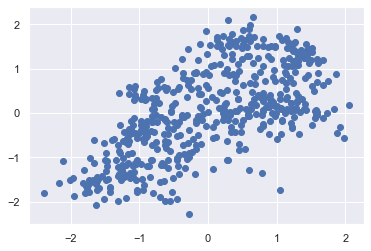

In [196]:
plt.scatter('temp','count',data=df_train)

In [197]:
# We divided into X and Y sets for the model building

In [198]:
y_train = df_train.pop('count')
X_train = df_train

In [199]:
# BUILDING MODEL - LINEAR MODEL

In [200]:
# Using recursive feature elimination for automated feature selection approach
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [201]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [202]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 12),
 ('Wed', False, 13)]

In [203]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [204]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [205]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [206]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [207]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          3.30e-179
Time:                        03:57:14   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6092      0.122     -4.974      0.000      -0.850      -0.369
temp            0.3984      0.027     14.773      0.000       0.345       0.451
year            1.0451      0.038     27.326      0.000       0.970       1.120
spring         -0.6819      0.056    -12.116      0.000      -0.792      -0.571
working_day     0.4421      0.122      3.633      0.000       0.203       0.681
Light Snow     -1.3226      0.114    -11.586      0.000      -1.547      -1.098
Mist           -0.3671      0.041     -8.999      0.000      -0.447      -0.287
July           -0.3011      0.081     -3.734      0.000      -0.460      -0.143
Sep             0.2845      0.073      3.900      0.000       0.141       0.428
Mon             0.2462      0.129      1.902      0.058      -0.008       0.500
Sun             0.4841      0.129      3.762      0.000       0.231       0.737
==============================================================================
Omnibus:                       59.973   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.538
Skew:                          -0.597   Prob(JB):                     4.57e-34
Kurtosis:                       5.408   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
X_train1= X_train_rfe.drop('Mon',1)

In [209]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [210]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.22e-179
Time:                        03:57:18   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4002      0.054     -7.374      0.000      -0.507      -0.294
temp            0.3999      0.027     14.797      0.000       0.347       0.453
year            1.0458      0.038     27.273      0.000       0.970       1.121
spring         -0.6842      0.056    -12.129      0.000      -0.795      -0.573
working_day     0.2327      0.052      4.476      0.000       0.131       0.335
Light Snow     -1.3185      0.114    -11.522      0.000      -1.543      -1.094
Mist           -0.3647      0.041     -8.922      0.000      -0.445      -0.284
July           -0.2972      0.081     -3.676      0.000      -0.456      -0.138
Sep             0.2757      0.073      3.777      0.000       0.132       0.419
Sun             0.2749      0.067      4.102      0.000       0.143       0.407
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
# All the variables with p-value less than 0.05

In [212]:
X_train_new= X_train2.drop('const',axis=1)

In [213]:
#VIF: Variation Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3  working_day  2.28
0         temp  2.02
2       spring  2.02
1         year  1.80
5         Mist  1.50
6         July  1.35
8          Sun  1.28
7          Sep  1.17
4   Light Snow  1.06

In [214]:
#I think, the result shows its perfect becuase all the variables have VIF less than 5

In [215]:
#Residual Analysis for Data
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

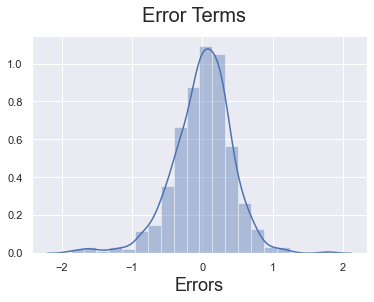

In [216]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [217]:
#Making Predictions:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [218]:
# Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test

In [219]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [220]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

Text(0, 0.5, 'Predictions')

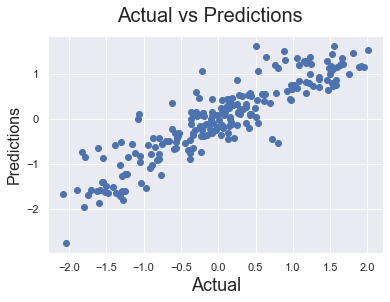

In [221]:

# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [222]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8075114920782749

In [223]:
#Final Evluation: 

   # The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

   # Spring season : -0.6842
   # Temperature : 0.3999
   # Mist : -0.3647
   # Sun : 0.2749
   # working_day : 0.2327